# Introduction
This analysis is a walkthrough of my attempt to solve the puzzle on a [Hopper](https://www.hopper.com/careers) job posting. The file is simple (two columns of unlabled data) as is the problem statement (uncover the story behind the data). Here we go!

In [2]:
# As a means of organizing the workbook, I'm handling all imports up front
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
# And I'll also load the data set up front
puzzle = pd.read_csv('https://raw.githubusercontent.com/jphil-16/Thinkful_Projects_JDP/main/hopper_puzzle.csv', header = None)

# Step 1 - what are we looking at?
My first thought with any unfamiliar data is to visually inspect a few of the rows just to get a basic sense of the data.

In [4]:
 puzzle.head()

,0,1
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


Well, right away I'm curious because the first 8 rows are all identical. What about the last few rows?

In [5]:
puzzle.tail()

,0,1
1019,0.658949,-1.553537
1020,0.843992,0.612621
1021,0.751561,1.299879
1022,0.906819,0.077444
1023,1.060808,-2.824606


Ok, nothing to see there. It is interesting to note that there is exactly 1024 rows of data - though that doesn't have to mean anything specific.

What else can we learn from a basic overview?

In [6]:
puzzle.describe()

,0,1
count,1024.000000,1024.000000
mean,0.504729,-0.388165
std,0.355107,1.499346
min,-0.925070,-2.837888
25%,0.389721,-1.559228
50%,0.591392,-1.129903
75%,0.746583,0.578621
max,1.195399,3.096964


Everything seems to be pretty well clustered around 0 and the quartiles show that there aren't any crazy outliers. This is good enough for a basic overview so let's move on.

# Step 2 - Visualization
Now that I have a basic idea of what the data looks like, my next idea is to create some visualizations to identify any interesting patterns in the data. Since we have two columns of numberical data clustered in a finite range, my first instinct is to create a simple scatter plot, and then possibly look at relationships between the two columns (e.g. what happens when you add/multiply the two numbers together?)

Let's start simple and just look at the two columns...

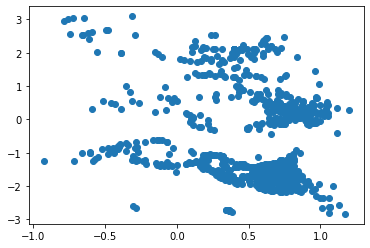

In [7]:
plt.scatter(puzzle[0], puzzle[1])
plt.show()

Immediately I am noticing some clusters and thinking about running some basic clustering models. There seems to be a very clear horizontal seperation right around y = -0.5 with the bottom right side of the plot emerging as a very strong and dense cluster. In general, the data seems to skew towards the right as well.

Let's not jump to any conclusions though, what happens if we flip the x and y coordinates?

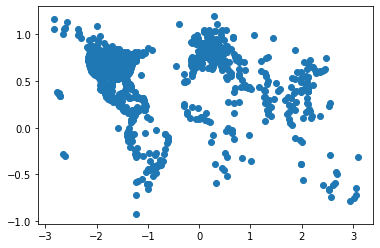

In [8]:
plt.scatter(puzzle[1], puzzle[0])
plt.show()

Well this is a pretty strong indication. It's a map! Well, roughly at least. A few notes that immediately jump out at me:
* North America seems to be the most well-defined, along with Europe (this corresponds to my observation of the clusters on the previous plot)
* In general, it seems like the data points are somewhat correlated to population, or at least developed countries (Sparely defined regions include Africa, Northern Asia, Northern Canada, and the intoriors of South America and Australia)
* There is some significant island representation, but no representation of Antartica

And a few questions:
* What's the deal with the repeated data points?
* Is there any significance to the order of the data?

That last question can problably be answered by a line plot:

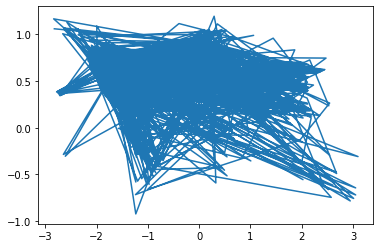

In [9]:
plt.plot(puzzle[1], puzzle[0])
plt.show()

Animating that plot would better show the progression as we move through the data, but this plot still shows enough to give us some bbasic information. For example, we can clearly see that the plot darts out to Australia and back multiple times without really hanging around. I need to take a deeper look into this later, but I'll keep moving for now.

# Step 3: Digging Deeper
Now I have a basic understanding that the data is somewhat related to geography. Could it be a map of the largest cities in the world? Or the most popular travel destinations?

Anything related to an ordinal list doesn't make sense due to the repeated data points though. Our next clue is probably something to do with those repeats so let's take a closer look there.

In [40]:
# Aggregate the data based on the first column
repeats = puzzle.groupby([0], sort = False).count()
# Drop the rows that only show up once
repeats = repeats[repeats[1] != 1]
# Show the result
print(repeats)

             1
0             
 0.397150  101
 0.061841    2
 0.719915    2
 0.745198    2
-0.388084    2
 0.715182    2
 1.067695    2
 0.636612    2
 0.690307    2
 0.713595    2
 0.900091    2
 0.895171    2
-0.065909    2


So there are 12 locations that are repeated a 2nd time, and one location that is repeated 100 times. Again, that is an interesting round number, and also interesting to note that these repeats are heavily clustered toward the front of the data set. Where is that data point that keeps showing up?

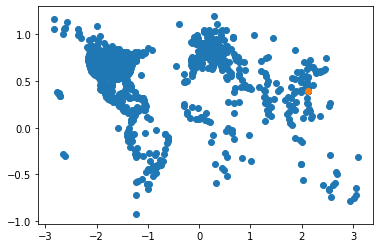

In [43]:
plt.scatter(puzzle[1], puzzle[0])
plt.scatter(2.113629, 0.39715)
plt.show()

# Step 4: Plans for further analysis
At this point, I have a few guesses about the nature of this data:
* Hopper inquiries for destinations over a certain period of time (where one Hopper user repeatedly searched for the repeated Asian destination)
* A map of airports with planned outbound flights for the day (if it is a single Asia-based airline, that would explain a cluster of outbound flights early in the day and sporadic activity across the world as time goes on)
* Something unrelated to travel entirely (because this is related to Hopper, I am assuming that the answer is travel-related, but maybe that is not a good assumption! This could be mapping online sales for a retail company, shipping patterns for deliveries, etc.)

If I were to continue with this puzzle, my next steps would be:
* Overlay the scatter plot with a map of the world to more clearly see where the points are falling
* Compare the specific location of the points to some travel databases to test the assumption that the data is travel-related (e.g. airport locations or hotel locations)
* Return to the question about the order of the data and plot an animation of the line chart
* Use the results from the above steps to iterate on my hypothesis and continue refining an answer